In [0]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/DL/WorldModels-master/')

In [4]:
from rnn.arch import RNN
from vae.arch import VAE
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
rnn = RNN()
rnn.set_weights('./rnn/weights.h5')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








In [6]:
vae = VAE()
vae.set_weights("./vae/weights_single_vae.h5")

In [0]:
filelist = os.listdir("data/rollout")
filelist = [x for x in filelist if x != '.DS_Store']

In [0]:
idx = 59
r = np.load("data/rollout/"+filelist[idx])
s = np.load("data/series/"+filelist[idx])
sr = s['log_varS'].shape

zS = s['muS'] + np.exp(s['log_varS']/2.0) * np.random.randn(*sr)
zB = s['muB'] + np.exp(s['log_varB']/2.0) * np.random.randn(*sr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


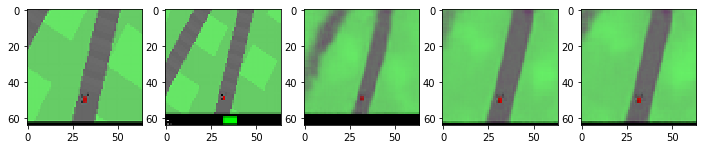

In [21]:
imx = 199
fig=plt.figure(figsize=(12, 9))
fig.add_subplot(2, 5, 1)
plt.imshow(r['obsS'][imx])
fig.add_subplot(2, 5, 2)
plt.imshow(r['obsB'][imx])
fig.add_subplot(2, 5, 3)
plt.imshow(vae.decoder.predict(vae.encoder.predict(r['obsB'][imx].reshape(1, 64, 64, 3))).reshape(64, 64, 3))
fig.add_subplot(2, 5, 4)
plt.imshow(vae.decoder.predict(vae.encoder.predict(vae.decoder.predict(vae.encoder.predict(r['obsS'][imx].reshape(1, 64, 64, 3))))).reshape(64, 64, 3))
fig.add_subplot(2, 5, 5)
plt.imshow(vae.decoder.predict(zS[imx].reshape(1, -1)).reshape(64, 64, 3))

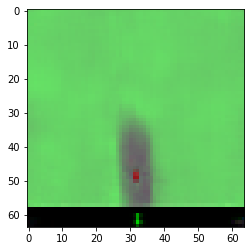

In [0]:
plt.imshow(vaeB.decoder.predict(rnn.model.predict(np.hstack([zS[imx], s['action'][0], s['reward'][0]]).reshape(1, 1, -1))[0,:,:32])[0])

In [0]:
vaeB.decoder.predict(rnn.model.predict(np.hstack([zS[imx], s['action'][0], s['reward'][0]]).reshape(1, 1, -1))[0,:,:32])[0].shape

(64, 64, 3)

In [0]:
!sudo apt-get update

In [0]:
!sudo apt-get install cmake swig python3-dev zlib1g-dev python-opengl mpich xvfb xserver-xephyr vnc4server

In [0]:
!pip install -r requirements.txt

Restart runtime after installing the requirements.txt and re-run the first 3 cells

In [0]:
!pip install box2d-py mpi4py pyglet==1.3.2

Generate data

In [0]:
!xvfb-run -a -s "-screen 0 1400x900x24" python 01_generate_data.py car_racing --total_episodes 20000 --time_steps 300

Train VAEs

In [0]:
#!python 02_train_vae.py

Generate RNN training data

In [0]:
!python 03_generate_rnn_data.py

Train RNN

In [0]:
!python 04_train_rnn.py

Using TensorFlow backend.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
STEP 0



Epoch 1/1


2020-01-03 15:17:09.464384: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-03 15:17:09.470038: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000170000 Hz
2020-01-03 15:17:09.470316: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1f44bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-03 15:17:09.470354: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-03 15:17:09.490143: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-03 15:17:09.496600: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CU

Train Controller

In [0]:
!xvfb-run -s "-screen 0 1400x900x24" python 05_train_controller.py car_racing --num_episode 4 --max_length 1000 --eval_steps 25

Traceback (most recent call last):
  File "05_train_controller.py", line 15, in <module>
    from pympler.tracker import SummaryTracker
ImportError: No module named pympler.tracker
[ba903744c7e6:07527] *** Process received signal ***
[ba903744c7e6:07527] Signal: Segmentation fault (11)
[ba903744c7e6:07527] Signal code: Address not mapped (1)
[ba903744c7e6:07527] Failing at address: 0x7f42f380120d
[ba903744c7e6:07527] [ 0] /lib/x86_64-linux-gnu/libpthread.so.0(+0x12890)[0x7f42f66ae890]
[ba903744c7e6:07527] [ 1] /lib/x86_64-linux-gnu/libc.so.6(getenv+0xa5)[0x7f42f62ed785]
[ba903744c7e6:07527] [ 2] /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4(_ZN13TCMallocGuardD1Ev+0x34)[0x7f42f6b58e44]
[ba903744c7e6:07527] [ 3] /lib/x86_64-linux-gnu/libc.so.6(__cxa_finalize+0xf5)[0x7f42f62ee615]
[ba903744c7e6:07527] [ 4] /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4(+0x13cb3)[0x7f42f6b56cb3]
[ba903744c7e6:07527] *** End of error message ***
